# Pre-processing:

1. **Data Cleaning:** Ensure consistency.
   1. Missing Values.
   2. Removing Duplicates.
2. **Data Transformation:** Getting a mean=0 and variance=1 so all features contribute equally to the model + better convergence speed of optimization algorithms.
   1. Normalization/Scaling: Standard range (0-1) using Min-Max scaling or Standardization (Z-score normalization)
   2. Encoding Categorical Variables: Into numerical form using One-Hot Encoding, Label Encoding, Target Encoding.
3. **Feature Engineering:** New features from current ones
   1. New features: from existing one (holidays, day-of-week, etc.)
   2. Feature Selection: More relevant ones through correlation analysis, model-based feature importance.
4. **Handling Imbalanced Data:** Address the skewed distribution of classes in **CLASSIFICATION PROBLEMS** 
   1. Significant imbalance between the number of instances of different classes, with one or more classes being underrepresented.
   2. *(if applicable) Oversampling: Increasing the number of minority class samples (e.g., SMOTE, ADASYN).*
   3. *(if applicable) Undersampling: Reducing the number of majority class samples.*
   4. Using metrics that account for class imbalance, such as Precision-Recall Curve, F1 Score, and AUC-ROC, instead of accuracy.
5. **Text Data Processing:** (if applicable)
   1. Tokenization.
   2. Removing Stop Words.
   3. Stemming/Lemmatization.
6. **Time-Series Data Processing:** (if applicable)
   1. Features based on time.
   2. Stationarity check.
7. **Outlier Detection and Treatment:** 
   1. Using statistical methods like Z-score and IQR.
8. **Dimensionality Reduction:** 
   1. Reducing # of features using Principal Component Analysis (PCA), t-SNE, or UMAP.
9.  **Data Splitting:**
    1.  Dividing data into training, test to evaluate model on unseen data.


# Linear Models:

## Dataset as Matrix "X""

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
- n: number of rows/inputs.
- d: number of features.

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

## Target Vector:

Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

**Goal**: Fit a linear model to the dataset.

1. **Model Representation**:
- $y^{(i)} \approx f_{\theta}(x^{(i)})$: This equation indicates that the target variable $y^{(i)}$ is approximately equal to the linear function $f_{\theta}(x^{(i)})$.
- $f_{\theta}(x^{(i)}) := \theta^T x^{(i)}$: The linear function $f_{\theta}(x^{(i)})$ is defined as the dot product of the parameter vector $\theta$ and the input vector $x^{(i)}$.
- $\theta \in \mathbb{R}^d$: The parameter vector $\theta$ has $d$ dimensions.
- $x^{(i)} \in \mathbb{R}^d$: The input vector $x^{(i)}$ also has $d$ dimensions.

### Linear Algebra Concepts:

#### T notation

The $\theta^T$ notation represents the transpose of the vector $\theta$. Transposing a vector means converting it from a column vector to a row vector or vice versa. 

In this example, the transposition allows the dot product operation $\theta^T x$ to be performed, where $\theta^T$ (row vector) and $x$ (column vector) result in a scalar value.

#### Dot Product

The dot product is an operation that takes two equal-length sequences of numbers (usually vectors) and returns a single number. It is calculated as:

$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i$

It measures the similarity between two vectors, with higher values indicating greater similarity.

## Objective/Cost Function

These is to be minimized.\
In this case it is a **squared error**.
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

Matrix-vector form:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta)$$

Euclidean norm:
$$J(\theta) = \frac{1}{2} \|y-X\theta\|^2$$

Sure, here's the explanation of terms using in-line math markdown syntax:

- **$y$**: The vector of actual target values, with size $n \times 1$.
- **$X$**: The design matrix (or feature matrix), with size $n \times d$, where each row represents an input vector $x^{(i)}$.
- **$\theta$**: The vector of parameters, with size $d \times 1$.
- **$y - X\theta$**: The difference between the actual target values and the predicted values, resulting in an $n \times 1$ vector of residuals.
- **$(y - X\theta)^T (y - X\theta)$**: The dot product of the residual vector with itself, which results in a scalar representing the sum of squared residuals.
- **$\| y - X\theta \|^2$**: The Euclidean norm (or L2 norm) of the residual vector squared, which is equivalent to the sum of squared residuals.

## The gradient of the Objective Function


### Gradient Vector
The gradient vector $\nabla_{\theta} J(\theta')$ is defined as:

$$\nabla_{\theta} J(\theta') = \begin{bmatrix}
\frac{\partial J(\theta')}{\partial \theta_1} \\
\frac{\partial J(\theta')}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\theta')}{\partial \theta_d}
\end{bmatrix}$$

### Explanation of Terms

- **$\nabla_{\theta} J(\theta')$**: The gradient of the cost function $J(\theta')$ with respect to the parameter vector $\theta$. The gradient is a vector of partial derivatives.
- **$\frac{\partial J(\theta')}{\partial \theta_i}$**: The partial derivative of the cost function $J(\theta')$ with respect to the $i$-th parameter $\theta_i$. This term represents the rate of change of the cost function with respect to changes in $\theta_i$.
- $\nabla_{\theta}$ is a shorthand notation for computing the gradient of a function with respect to the parameter vector \theta, providing the direction and rate of the fastest increase of the function.

### The Gradient of the Squared Error (OLS: Ordinary Least Square)

We can compute the gradient of the mean squared error as follows.

$$\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}$$

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

### The Gradient of the Squared Error: Normal Equations

Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$


# Non-Linear Models:

Recall that a polynomial of degree $p$ is a function of the form
$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

## One-Variable Polynomial Regression

Specifically, given a one-dimensional continuous variable $x$, we can define the *polynomial feature* function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

### This can be solved using a linear regression (OLS: Ordinary Least Squares)

The class of models of the form:

$$f_{\theta}(x) := \sum_{j=0}^{p} \theta_j x^j = \theta^T \phi(x)$$

- **$f_{\theta}(x)$**: The model's prediction as a function of $x$.
- **$\sum_{j=0}^{p} \theta_j x^j$**: This is the polynomial regression equation where each $\theta_j$ is a parameter (coefficient) corresponding to $x^j$.
- **$\theta$**: The vector of parameters (coefficients) $\theta = [\theta_0, \theta_1, \ldots, \theta_p]^T$.
- **$\phi(x)$**: The polynomial feature vector as defined earlier.

**Ordinary Least Squares (OLS)**
$$J(\theta) = \frac{1}{2} \sum_{i=1}^{p} \left( y^{(i)} - \theta^T \phi(\mathbf{x}^{(i)}) \right)^2$$


## Multivariate Polynomial Regression

In general, a polynomial of degree $p$ over two variables $x_1, x_2$ is a function of the form
$$
f(x_1, x_2) = \sum_{i,j \geq 0 : i+j \leq p} a_{ij} x_1^i x_2^j.
$$

For the given two-dimensional input  $\mathbf{x} = [x_1, x_2]$ , the feature function $\phi$ is defined as:

$$\phi : \mathbb{R}^2 \to \mathbb{R}^6$$

This means that $\phi$ maps a 2-dimensional input space to a 6-dimensional feature space. The transformed features are:

$$\phi(\mathbf{x}) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}$$

### Explanation of the Feature Function

1. Constant Term:
   - $1$: This is the intercept term (also known as the bias term), which allows the model to fit a constant offset.
2.	First-Degree Terms:
    -	$x_1$: The original first input variable.
    -	$x_2$: The original second input variable.
3.	Second-Degree Terms:
    -	$x_1^2$: The square of the first input variable.
    -	$x_2^2$: The square of the second input variable.
    -	$x_1 x_2$: The interaction term between the first and second input variables.

### General Non-Linear Features (OLS)

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used in this way to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{p} \left( y^{(i)} - \theta^T \phi(\mathbf{x}^{(i)}) \right)^2$$

# Regularitzation
 

 $$\underbrace{J(f)}_\text{Cost Function} = \underbrace{\frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)}))}_\text{Learning Objective} + \underbrace{\lambda \cdot R(f)}_\text{New Regularization Term}$$

- $J(f)$ : The regularized objective function.
- $\frac{1}{n} \sum_{i=1}^{n} L(y^{(i)}, f(x^{(i)}))$ : The learning objective, which represents the average loss over the training data. Here,  $L(y^{(i)}, f(x^{(i)}))$  is the loss function measuring the difference between the true value  $y^{(i)}$  and the predicted value  $f(x^{(i)})$ .
- $\lambda \cdot R(f)$ : The regularization term, where  R(f)  is the regularizer and  \lambda  is the hyperparameter controlling the strength of the regularization.

## L2 Regularization (Ridge)

With L2 regularization, the cost function becomes:

$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

Here,  $\lambda$  is the regularization parameter, and the term  $\frac{\lambda}{2} \sum_{j=1}^{d} \theta_j^2$  penalizes large values of the parameters  $\theta$.

## L2 Regularization for Polynomial Regression

Let's consider an application to the polynomial model we have seen so far. Given polynomial features $\phi(x)$, we optimize the following objective:

$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$

### In simple words:

Just like the MSE gives a higher "penalty" to larger values (as these are $x^2$), the lambda value will give extra penalty to large values across the vector $\theta$.

### Components Refresh!

1. **$J(\theta)$**:
   - __*Type*__: Scalar
   - **Definition**: The cost function (or objective function) that we aim to minimize during the training of the model.
   - **Role**: It measures the performance of the model by combining the error on the training data and a penalty for model complexity.
   

2. **$\frac{1}{2n}$**:
   - __*Type*__: Scalar
   - **Definition**: A scaling factor.
   - **Role**: Normalizes the sum of squared errors by the number of training examples $n$ and includes a factor of $\frac{1}{2}$ for mathematical convenience (it simplifies the derivative calculations).

3. **$\sum_{i=1}^{n}$**:
   - __*Type*__: Summation over $n$ terms
   - **Definition**: Summation notation.
   - **Role**: Indicates that we are summing over all $n$ training examples.

4. **$y^{(i)}$**:
   - __*Type*__: Scalar
   - **Definition**: The actual target value for the $i$-th training example.
   - **Role**: Represents the true output that the model aims to predict.

1. **$\theta$**:
   - **Type**: Vector of size $d \times 1$
   - **Definition**: The parameter vector, where $d$ is the number of features (including polynomial features if applicable).

2. **$\phi(x^{(i)})$**:
   - **Type**: Vector of size $d \times 1$
   - **Definition**: The transformed feature vector for the $i$-th training example, containing the polynomial or other non-linear features.

5. **$\theta^\top \phi(x^{(i)})$**:
   - __*Type*__: Scalar
   - **Definition**: The dot product (inner product) of the parameter vector $\theta$ and the transformed feature vector $\phi(x^{(i)})$, resulting in a single predicted value for the  $i$-th training example.

6. **$\left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2$**:
   - __*Type*__: Scalar
   - **Definition**: The squared error for the $i$-th training example.
   - **Role**: he squared error for the  $i$-th training example, which is a single number representing the squared difference between the actual target value and the predicted value.

7. **$\frac{\lambda}{2}$**:
   - __*Type*__: Scalar
   - **$\lambda$**: The regularization parameter that controls the strength of the penalty for model complexity.
   - **Definition**: A scaling factor for the regularization term.
   - **Role**: Balances the trade-off between fitting the training data and keeping the model parameters small to prevent overfitting.

8. **$||\theta||_2^2$**:
   - __*Type*__: Scalar
   - **Definition**: The L2 norm squared of the parameter vector $\theta$.
   - **Calculation**: $||\theta||_2^2 = \sum_{j=1}^{d} \theta_j^2$, where $\theta_j$ are the individual components of $\theta$.
   - **Role**: Penalizes large values of the model parameters, encouraging simpler models with smaller coefficients. Calculated as the sum of the squares of the elements of $\theta$.


## How to Choose $\lambda$? Hyperparameter Search

We refer to $\lambda$ as a __hyperparameter__, because it's a high-level parameter that controls other parameters.
How do we choose $\lambda$?
* We select the $\lambda$ with the best performance on the development set.
* If we don't have enough data, we select $\lambda$ by cross-validation.



# Some hands-in examples:

Text(0, 0.5, 'Diabetes Risk')

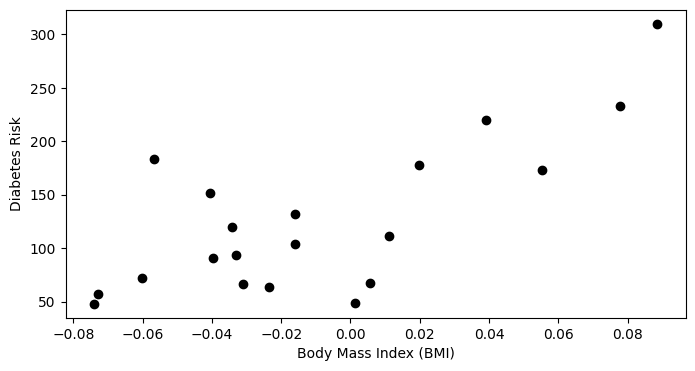

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [2]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362,1
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015568,-0.046641,1
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024055,0.023775,1
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783,1
426,0.030811,0.050680,-0.034229,0.043666,0.057597,0.068831,-0.032356,0.057557,0.035459,0.085907,1


In [3]:
import numpy as np

theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.797822,204.775932,-64.275792,-263.01616,14008.122523,-11802.044811,-5893.847369,-1137.012428,-2737.876706,-394.034371,155.705025


In [4]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

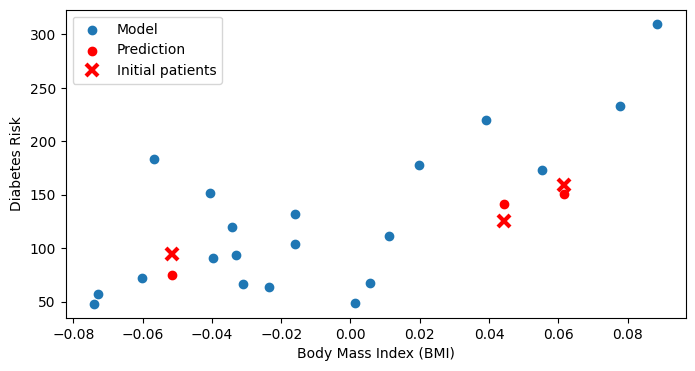

In [5]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='red', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

Polynomial Functions - Review:

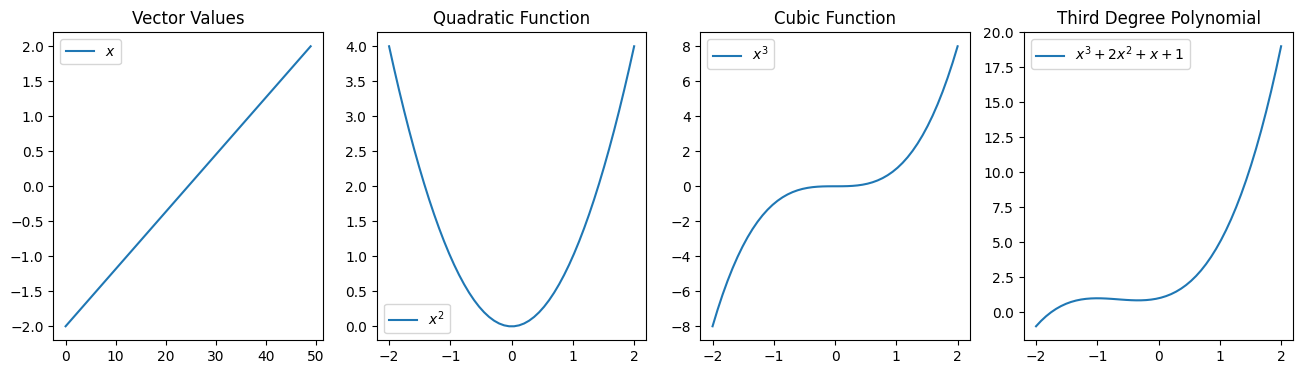

In [14]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-2, 2)

plt.subplot(141)
plt.title('Vector Values')
plt.plot(x_vars)
plt.legend(["$x$"])

plt.subplot(142)
plt.title('Quadratic Function')
plt.plot(x_vars, x_vars**2)
plt.legend(["$x^2$"])

plt.subplot(143)
plt.title('Cubic Function')
plt.plot(x_vars, x_vars**3)
plt.legend(["$x^3$"])

plt.subplot(144)
plt.title('Third Degree Polynomial')
plt.plot(x_vars, x_vars**3 + 2*x_vars**2 + x_vars + 1)
plt.legend(["$x^3 + 2 x^2 + x + 1$"])

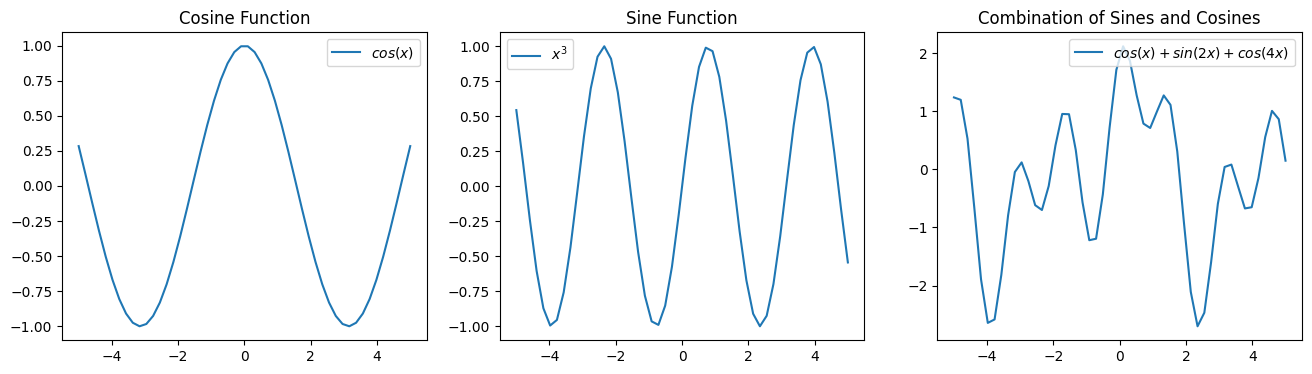

In [20]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-5, 5)

plt.subplot(131)
plt.title('Cosine Function')
plt.plot(x_vars, np.cos(x_vars))
plt.legend(["$cos(x)$"])

plt.subplot(132)
plt.title('Sine Function')
plt.plot(x_vars, np.sin(2*x_vars))
plt.legend(["$x^3$"])

plt.subplot(133)
plt.title('Combination of Sines and Cosines')
plt.plot(x_vars, np.cos(x_vars) + np.sin(2*x_vars) + np.cos(4*x_vars))
plt.legend(["$cos(x) + sin(2x) + cos(4x)$"])

A third degree polynomial:

In [15]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


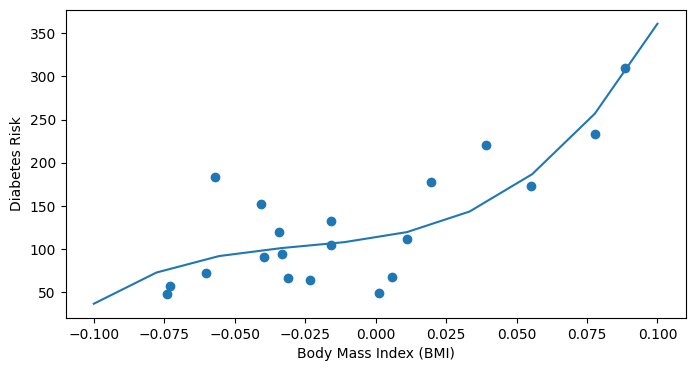

In [16]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)